## <center> MLP Classifier applied on RGB images </center>

In [17]:
#import necessary libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, recall_score, accuracy_score, f1_score, precision_score, roc_auc_score

In [18]:
data_dir = r'C:\Users\Siwar\Downloads\data'  
indoor_dir = os.path.join(data_dir, 'indoors')  # Path to the indoor images folder
outdoor_dir = os.path.join(data_dir, 'outdoors')  # Path to the outdoor images folder

# Function to read and process the images
def read_images(directory, target_size=(250, 190)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            img = img.resize(target_size)  
            images.append(img)
    return images

# Read indoor images
indoor_images = read_images(indoor_dir)
print(f"Total indoor images: {len(indoor_images)}")

# Read outdoor images
outdoor_images = read_images(outdoor_dir)
print(f"Total outdoor images: {len(outdoor_images)}")

Total indoor images: 829
Total outdoor images: 834


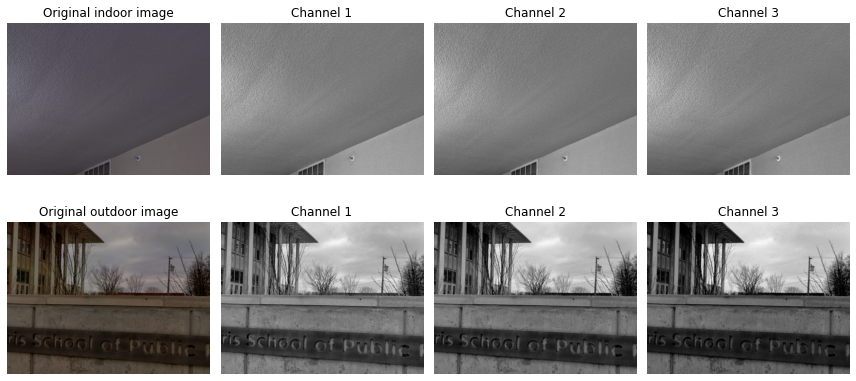

In [19]:
indoor_image_files = [os.path.join(indoor_dir, filename) for filename in os.listdir(indoor_dir) if filename.endswith('.png')]
outdoor_image_files = [os.path.join(outdoor_dir, filename) for filename in os.listdir(outdoor_dir) if filename.endswith('.png')]

# Read and visualize an indoor image and an outdoor image and their 3 channels
indoor_img = Image.open(indoor_image_files[0])
outdoor_img = Image.open(outdoor_image_files[0])
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.imshow(indoor_img)
plt.title('Original indoor image')
plt.axis('off')
for i, channel in enumerate(indoor_img.split()):
    plt.subplot(2, 4, i+2)
    plt.imshow(channel, cmap='gray')
    plt.title(f'Channel {i+1}')
    plt.axis('off')
plt.subplot(2, 4, 5)
plt.imshow(outdoor_img)
plt.title('Original outdoor image')
plt.axis('off')
for i, channel in enumerate(outdoor_img.split()):
    plt.subplot(2, 4, i+6)
    plt.imshow(channel, cmap='gray')
    plt.title(f'Channel {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
# converting each image into a vector
indoor = np.array([np.array(img).reshape(-1) for img in indoor_images])
outdoor = np.array([np.array(img).reshape(-1) for img in outdoor_images])

In [21]:
# Split indoor images into train and test sets
indoor_train, indoor_test = train_test_split(indoor, test_size=0.2, random_state=42)

# Split outdoor images into train and test sets
outdoor_train, outdoor_test = train_test_split(outdoor, test_size=0.2, random_state=42)

# Print the lengths of the train and test sets
print("Indoor Train Size:", len(indoor_train))
print("Indoor Test Size:", len(indoor_test))
print("Outdoor Train Size:", len(outdoor_train))
print("Outdoor Test Size:", len(outdoor_test))

Indoor Train Size: 663
Indoor Test Size: 166
Outdoor Train Size: 667
Outdoor Test Size: 167


In [22]:
# train and test sets
indoor_labels = np.zeros(len(indoor_train))
outdoor_labels = np.ones(len(outdoor_train))
X_train = np.concatenate((indoor_train, outdoor_train))
y_train = np.concatenate((indoor_labels, outdoor_labels))
indoor_labels_test = np.zeros(len(indoor_test))
outdoor_labels_test = np.ones(len(outdoor_test))
X_test = np.concatenate((indoor_test, outdoor_test))
y_test = np.concatenate((indoor_labels_test, outdoor_labels_test))

print("Train Size:", len(X_train))
print("Test Size:", len(X_test))
print("Train Labels:", len(y_train))
print("Test Labels:", len(y_test))

Train Size: 1330
Test Size: 333
Train Labels: 1330
Test Labels: 333


In [23]:
# MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(100,), batch_size=200, max_iter=200, learning_rate_init=0.001, activation='relu', alpha= 0.001,random_state=42)

In [25]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy,2))

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", round(recall,2))

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", round(precision,2))

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", round(f1,2))

# Calculate AUC-ROC score
auc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", round(auc,2))

Accuracy: 0.73
Recall: 0.55
Precision: 0.87
F1 Score: 0.67
AUC-ROC: 0.73
